In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

In [2]:
LoanData = pd.read_csv("Loan Data 2.csv")

In [3]:
LD = LoanData[LoanData!= '..']
LD1 = LD.dropna()
LD1.head()
LD1.info()
LD1.describe()
LD1.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41336 entries, 0 to 41401
Data columns (total 21 columns):
Loan Amount                  41336 non-null int64
Funded Amouint               41336 non-null int64
Term                         41336 non-null object
Interest Rate                41336 non-null object
Installment                  41336 non-null float64
Employment Length            41336 non-null object
Home Ownership               41336 non-null object
annual_inc                   41336 non-null float64
Approved Date                41336 non-null object
Loan Status                  41336 non-null object
Purpose                      41336 non-null object
Borrower's State             41336 non-null object
DTI                          41336 non-null float64
Delinquencies last 2-yrs     41336 non-null float64
Earliest Credit Line         41336 non-null object
# Inquiries last 6 months    41336 non-null float64
Open Accounts                41336 non-null float64
Revolving Balance   

Index(['Loan Amount', 'Funded Amouint', 'Term', 'Interest Rate', 'Installment',
       'Employment Length', 'Home Ownership', 'annual_inc', 'Approved Date',
       'Loan Status', 'Purpose', 'Borrower's State', 'DTI',
       'Delinquencies last 2-yrs', 'Earliest Credit Line',
       '# Inquiries last 6 months', 'Open Accounts', 'Revolving Balance',
       'Revolving %', 'Total # of Accounts', 'Total Debt Owed'],
      dtype='object')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


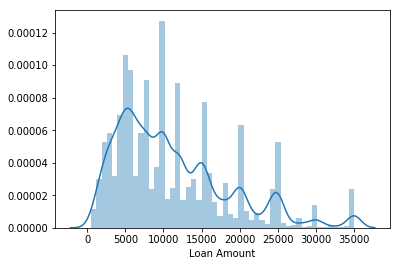

In [4]:
sns.distplot(LD1['Loan Amount'])

In [5]:
LD2 = LD1.corr()
print(LD2)

                           Loan Amount  Funded Amouint  Installment  \
Loan Amount                   1.000000        0.981540     0.930252   
Funded Amouint                0.981540        1.000000     0.956185   
Installment                   0.930252        0.956185     1.000000   
annual_inc                    0.273568        0.269381     0.275256   
DTI                           0.063342        0.063117     0.052976   
Delinquencies last 2-yrs     -0.034461       -0.035295    -0.021873   
# Inquiries last 6 months    -0.030624       -0.030294    -0.010972   
Open Accounts                 0.172499        0.170692     0.171505   
Revolving Balance             0.252412        0.248643     0.263298   
Total # of Accounts           0.255599        0.249652     0.232504   
Total Debt Owed               0.882167        0.898518     0.847634   

                           annual_inc       DTI  Delinquencies last 2-yrs  \
Loan Amount                  0.273568  0.063342                 -0.034

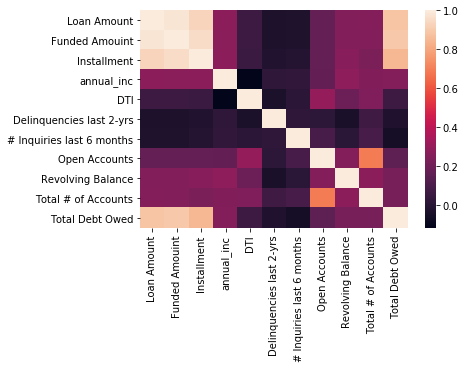

In [33]:
sns.heatmap(LD2)
plt.savefig('Heatmap.png')

In [26]:
X = LD1[['Funded Amouint', 'Installment', 'annual_inc',
               'Loan Amount', 'Delinquencies last 2-yrs','# Inquiries last 6 months', 'Open Accounts', 'Revolving Balance',
         'Total # of Accounts', 'Total Debt Owed']]
y = LD1['DTI']
print(X.shape, y.shape)

(41336, 10) (41336,)


In [27]:
#X = LD1[['DTI', 'Delinquencies last 2-yrs']]
#y = LD1['Loan Amount']
#print(X.shape, y.shape)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1000)

In [29]:
model = LinearRegression()

In [30]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
predictions = model.predict(X_test)

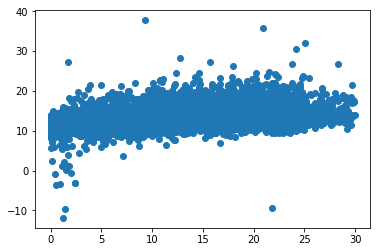

In [34]:
plt.scatter(y_test,predictions)
plt.savefig('DTI_Reg.png')

In [36]:
X = LD1[['Funded Amouint', 'Installment', 'annual_inc',
               'DTI', 'Delinquencies last 2-yrs','# Inquiries last 6 months', 'Open Accounts', 'Revolving Balance',
         'Total # of Accounts', 'Total Debt Owed']]
y = LD1['Loan Amount']
print(X.shape, y.shape)

(41336, 10) (41336,)


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1000)

In [38]:
model = LinearRegression()

In [39]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [40]:
predictions = model.predict(X_test)

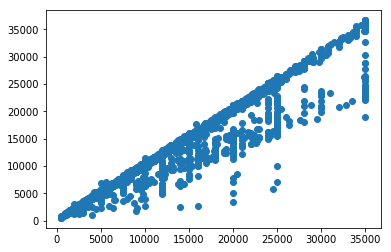

In [41]:
plt.scatter(y_test,predictions)
plt.savefig('LA_Reg.png')